# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


###  Import Statements


In [958]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Notebook Presentation

In [959]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [960]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [961]:
print(f'There are {df_data.shape[0]} rows and {df_data.shape[1]} columns')

There are 2000 rows and 96 columns


In [962]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [963]:
df_data.isna().values.any()

# There are missing values in the dataframe

True

## Check for Duplicates

Find and remove any duplicate rows.

In [964]:
df_data.isna().sum().sort_values(ascending=False).head(20)

# There are 16 columns with missing values

PRMONF      1073
PRMONM       879
PRFSTYAE     790
PRFSTYAN     790
PRFSTYUN     790
PRFSTYPE     790
PRMSTYUN     533
PRMSTYPE     533
PRMSTYAN     533
PRMSTYAE     533
SFR          399
POVRAT97     373
HHINC97      370
SMR           82
JOBS          47
AGEMBTH       44
ID             0
SM             0
REG97NE        0
SF             0
dtype: int64

In [965]:
df_data.duplicated().values.sum()

# There are 513 duplicated rows

513

In [966]:
df_data.drop_duplicates(inplace=True)

In [967]:
df_data.shape

# Shape of dataframe after dropping duplicated rows

(1487, 96)

In [968]:
df_data.reset_index(inplace=True)
df_data.drop('index', axis=1, inplace=True)

In [969]:
df_data

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,2400,9.00,12,10.83,1,0,1982,29,29.00,"73,100.00",...,0,0,0,1,0,0,0,1,0,0
1483,3018,8.00,12,9.37,1,0,1982,29,23.00,"66,300.00",...,1,0,1,0,0,0,1,0,0,0
1484,4550,8.57,17,6.29,1,0,1984,27,25.00,"76,300.00",...,0,0,0,0,1,0,1,0,0,0
1485,3779,9.33,12,9.12,1,0,1984,27,22.00,NaN,...,1,0,0,1,0,0,1,0,0,0


## Initialize all related column names in lists

In [970]:
gender_col_names = ['MALE', 'FEMALE']
ethnic_col_names = ['ETHBLACK', 'ETHHISP', 'ETHWHITE']
education_col_names = ['EDUCPROF','EDUCPHD','EDUCMAST','EDUCBA','EDUCAA','EDUCHSD','EDUCGED','EDUCDO'] 
marital_status_col_names = ['SINGLE', 'MARRIED', 'COHABIT', 'OTHSING']
asvab_col_names = ['ASVABWK','ASVABPC','ASVABNO','ASVABMV', 'ASVABMK','ASVABCS','ASVABC4','ASVABC','ASVABAR','VERBAL']
faith_col_names = ['FAITHN','FAITHC','FAITHJ','FAITHP','FAITHO','FAITHM']
metropolitan_col_names = ['MSA97NO','MSA97NCC','MSA97CC','MSA97NK']
rural_urban_col_names = ['RS97RURL','RS97URBN','RS97UNKN']
census_region_col_names = ['REG97NE','REG97NC','REG97W','REG97S']
hold_structure_col_names = ['HHBMBF','HHBMOF','HHOMBF','HHBMONLY','HHBFONLY','HHOTHER']
parental_monitor_col_names = ['PRMONM', 'PRMONF']
parental_style_col_names = ['PRMSTYUN','PRMSTYPE','PRMSTYAN','PRMSTYAE','PRFSTYUN','PRFSTYPE','PRFSTYAN','PRFSTYAE']
cat_col_names = ['CATGOV','CATPRI','CATSE','CATNPO','CATMIS']
living_region_col_names = ['REGNE','REGNC','REGW','REGS']
living_metro_col_names = ['MSA11NO','MSA11NCC','MSA11CC','MSA11NK','MSA11NIC']

## Check for missing values

In [971]:
df_data.isna().sum().sort_values(ascending=False).head(20)

# There are 16 columns with missing values

PRMONF      789
PRMONM      636
PRFSTYAE    583
PRFSTYAN    583
PRFSTYUN    583
PRFSTYPE    583
PRMSTYUN    387
PRMSTYPE    387
PRMSTYAN    387
PRMSTYAE    387
SFR         290
POVRAT97    284
HHINC97     282
SMR          57
JOBS         38
AGEMBTH      34
ID            0
SM            0
REG97NE       0
SF            0
dtype: int64

In [972]:
# Drop the columns with more than 300 missing values
missing_vals_cols_to_drop = parental_monitor_col_names + parental_style_col_names
df_data.drop(missing_vals_cols_to_drop, axis=1, inplace=True)

In [973]:
df_data.isna().sum().sort_values(ascending=False).head(10)

SFR         290
POVRAT97    284
HHINC97     282
SMR          57
JOBS         38
AGEMBTH      34
SF            0
REG97W        0
REG97S        0
REG97NC       0
dtype: int64

In [974]:
remaining_cols_missing_vals = ['SFR', 'SMR', 'JOBS', 'AGEMBTH', 'HHINC97', 'POVRAT97']
df_data[remaining_cols_missing_vals].describe()

,SFR,SMR,JOBS,AGEMBTH,HHINC97,POVRAT97
count,"1,197.00","1,430.00","1,449.00","1,453.00","1,205.00","1,203.00"
mean,13.60,13.43,5.90,26.32,"58,310.67",362.26
std,2.95,2.66,3.27,5.08,"43,868.05",294.23
min,3.00,1.00,1.00,12.00,0.00,0.00
25%,12.00,12.00,3.00,23.00,"32,000.00",190.50
50%,13.00,13.00,5.00,26.00,"50,500.00",302.00
75%,16.00,16.00,8.00,30.00,"72,000.00",441.00
max,20.00,20.00,24.00,45.00,"246,474.00","1,627.00"


In [975]:
# For SFR, SMR, JOBS and AGEMBTH, fill in the missing values with the median.
for col_name in remaining_cols_missing_vals[:4]:
    df_data[col_name].fillna(df_data[col_name].median(), inplace=True)

In [976]:
# For the Seaborn warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<Axes: xlabel='HHINC97', ylabel='Count'>

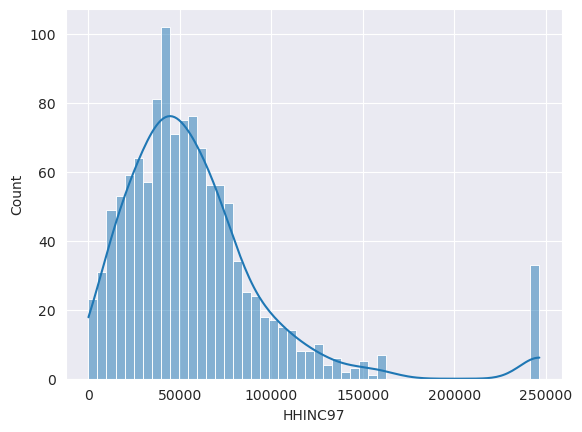

In [977]:
# However for HHINC97 and POVRAT97, let me try to visualize the distribution
sns.histplot(df_data.HHINC97, bins=50, kde=True) 

<Axes: xlabel='POVRAT97', ylabel='Count'>

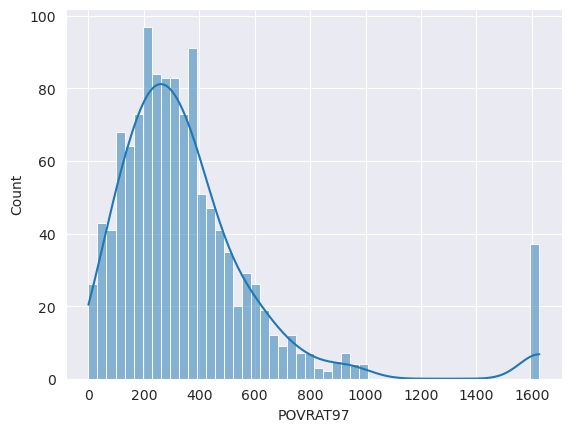

In [978]:
sns.histplot(df_data.POVRAT97, kde=True, bins=50)

In [979]:
# The medians can also be used in both cases
df_data['POVRAT97'].fillna(df_data['POVRAT97'].median(), inplace=True)
df_data['HHINC97'].fillna(df_data['HHINC97'].median(), inplace=True)

In [980]:
df_data.isna().sum().sort_values(ascending=False).head(10)

# Now there aren't any missing values

ID          0
WEIGHT11    0
REG97S      0
REG97NC     0
REG97NE     0
SIBLINGS    0
SMR         0
SFR         0
SM          0
SF          0
dtype: int64

## Data Analysis

In [981]:
sns.set_style('darkgrid')

In [982]:
df_data.shape

(1487, 86)

In [983]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1487 non-null   float64
 9   HHINC97   1487 non-null   float64
 10  POVRAT97  1487 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int6

In [984]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"56,829.43",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.02,"39,605.44",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"36,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"66,400.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [985]:
df_data.ID.duplicated().values.any()

False

<Axes: xlabel='EARNINGS', ylabel='Count'>

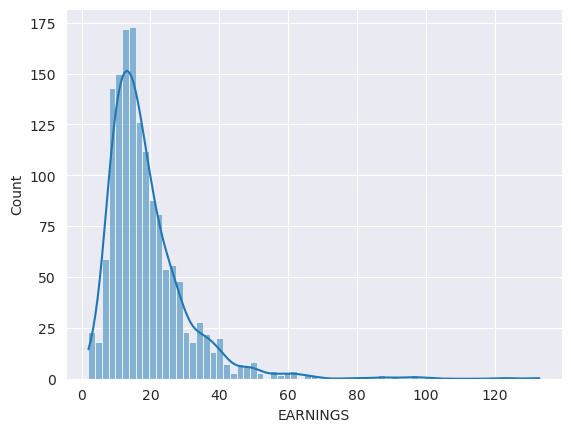

In [986]:
# Start of by plotting the distribution of the Earnings column
sns.histplot(df_data.EARNINGS, kde=True)

Based on the distribution of the above plot, this looks a regression problem

In [987]:
# Find out the correlation between the EARNINGS column with the other column
df_data.corr().sort_values(by='EARNINGS', ascending=False).head(10)

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
EARNINGS,-0.14,1.00,0.28,-0.02,-0.12,0.12,-0.08,0.08,0.08,0.21,...,0.03,0.07,-0.07,-0.05,0.07,-0.03,-0.04,0.05,0.04,NaN
S,-0.10,0.28,1.00,-0.58,0.16,-0.16,-0.04,0.04,0.25,0.29,...,0.09,0.07,0.01,-0.09,0.02,-0.06,-0.05,0.07,0.00,NaN
ASVABMK,-0.11,0.27,0.54,-0.23,0.09,-0.09,-0.02,0.02,0.21,0.26,...,0.06,0.10,-0.01,-0.07,-0.01,-0.08,-0.03,0.06,-0.01,NaN
ASVABAR,-0.08,0.26,0.46,-0.20,-0.01,0.01,0.01,-0.01,0.20,0.24,...,0.06,0.06,0.05,-0.11,0.03,-0.07,-0.05,0.08,0.00,NaN
ASVABC4,-0.09,0.25,0.55,-0.25,0.07,-0.07,0.01,-0.01,0.24,0.27,...,0.07,0.09,0.03,-0.10,0.01,-0.08,-0.04,0.07,-0.00,NaN
ASVABC,-0.08,0.24,0.52,-0.24,0.04,-0.04,0.01,-0.01,0.23,0.26,...,0.07,0.07,0.04,-0.11,0.02,-0.08,-0.04,0.07,0.00,NaN
ASVABMV,-0.09,0.24,0.56,-0.28,0.06,-0.06,0.03,-0.03,0.24,0.26,...,0.06,0.09,0.02,-0.09,0.00,-0.07,-0.04,0.07,-0.00,NaN
HHINC97,-0.16,0.21,0.29,-0.09,-0.01,0.01,-0.04,0.04,0.27,1.00,...,0.02,-0.02,0.03,-0.05,0.03,-0.06,-0.03,0.05,-0.01,NaN
EDUCPROF,-0.07,0.20,0.21,-0.14,0.00,-0.00,-0.02,0.02,0.03,0.10,...,0.01,0.01,0.00,-0.02,0.01,-0.00,-0.02,0.02,-0.01,NaN
VERBAL,-0.07,0.19,0.51,-0.25,0.10,-0.10,0.02,-0.02,0.24,0.25,...,0.07,0.08,0.03,-0.09,0.01,-0.08,-0.03,0.06,0.00,NaN


In [988]:
df_data.corr().sort_values(by='EARNINGS', ascending=False).tail(10)

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
JOBS,0.10,-0.09,0.05,0.00,0.03,-0.03,-0.22,0.22,0.02,0.04,...,0.06,-0.03,-0.00,-0.00,0.03,0.00,-0.07,0.07,0.02,NaN
COHABIT,0.05,-0.09,-0.12,0.03,-0.00,0.00,0.04,-0.04,-0.04,-0.07,...,0.02,0.00,0.00,-0.01,0.01,-0.01,-0.02,0.03,-0.02,NaN
ETHBLACK,0.04,-0.10,-0.05,-0.06,0.07,-0.07,-0.04,0.04,-0.14,-0.14,...,0.04,-0.04,-0.10,0.25,-0.14,0.02,-0.05,0.04,0.03,NaN
FEMALE,0.05,-0.12,0.16,-0.08,1.00,-1.00,0.01,-0.01,0.02,-0.01,...,-0.01,0.00,-0.02,0.01,0.01,-0.03,-0.01,0.02,-0.01,NaN
MSA97NO,0.50,-0.13,-0.07,-0.00,0.01,-0.01,-0.01,0.01,-0.06,-0.13,...,-0.21,-0.04,0.11,0.00,-0.09,0.29,-0.04,-0.08,-0.02,NaN
ID,1.00,-0.14,-0.10,0.02,0.05,-0.05,-0.00,0.00,-0.07,-0.16,...,-0.18,-0.24,-0.03,0.15,0.07,0.16,-0.03,-0.04,-0.00,NaN
EDUCHSD,0.07,-0.14,-0.46,0.36,-0.09,0.09,0.00,-0.00,-0.13,-0.13,...,-0.07,-0.07,0.03,0.02,0.01,0.03,0.04,-0.05,-0.04,NaN
EDUCGED,0.02,-0.15,-0.39,0.13,-0.01,0.01,0.03,-0.03,-0.14,-0.14,...,-0.02,-0.01,-0.02,0.06,-0.04,-0.00,-0.01,0.01,0.04,NaN
RS97UNKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSA11NIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The column S(Years of schooling) seems like an ideal feature to start with since it is the most highly correlated feature with EARNINGS in the dataset

## Implement ML Algorithm

For this dataset, I will mostly use XGBoost as the main ML algorithm.

However for starters, I will use Scikit-learn to implement a simple linear model

In [989]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

from math import sqrt

In [990]:
# Create a linear regression
def implement_linear(X_train, X_test, y_train, y_test):
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    lm_train_pred = lm.predict(X_train)
    lm_test_pred = lm.predict(X_test)

    print(f"Train data RMSE: {sqrt(mean_squared_error(lm_train_pred, y_train))}")
    print(f"Test data RMSE: {sqrt(mean_squared_error(lm_test_pred, y_test))}")

In [991]:
X = df_data[['S']]
y = df_data['EARNINGS']

In [992]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [993]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (1189, 1)
y train shape: (1189,)
X test shape: (298, 1)
y test shape: (298,)


In [994]:
implement_linear(X_train, X_test, y_train, y_test)

Train data RMSE: 11.830716491104468
Test data RMSE: 10.116684072202636


Not quite a good score but can act as a baseline

Now, time to implement XGBoost

In [995]:
import xgboost as xgb

In [996]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

Simple training and evaluation

In [997]:
n = 300
params = {'objective': 'reg:squarederror', 'tree_method': 'hist'}

In [998]:
xgb_model = xgb.train(dtrain=dtrain_reg, params=params)

In [999]:
xgb_train_preds = xgb_model.predict(dtrain_reg)
xgb_test_preds = xgb_model.predict(dtest_reg)

In [1000]:
print(f"Train data RMSE: {sqrt(mean_squared_error(xgb_train_preds, y_train)):.6}")
print(f"Test data RMSE: {sqrt(mean_squared_error(xgb_test_preds, y_test)):.6}")

Train data RMSE: 11.7851
Test data RMSE: 10.0749


Not really the best score either but slightly better than Linear Regression

Using Validation Sets During Training

In [1001]:
def implement_xgboost(train_dmatrix, params, evals, num_boost, stop_round, verbose_eval):
    evals_result = {}

    model = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=num_boost, 
                    verbose_eval=verbose_eval, early_stopping_rounds=stop_round, evals=evals,
                    evals_result=evals_result) 

    plt.plot(evals_result['Training']['rmse'], label='Train')
    plt.plot(evals_result['Validation']['rmse'], label='Test')
    plt.ylabel('RMSE')
    plt.xlabel('Number of rounds')
    plt.legend()

    return model

[0]	Training-rmse:12.05389	Validation-rmse:10.30832
[10]	Training-rmse:11.78482	Validation-rmse:10.07549
[20]	Training-rmse:11.78446	Validation-rmse:10.07730
[30]	Training-rmse:11.78445	Validation-rmse:10.07736
[36]	Training-rmse:11.78445	Validation-rmse:10.07736


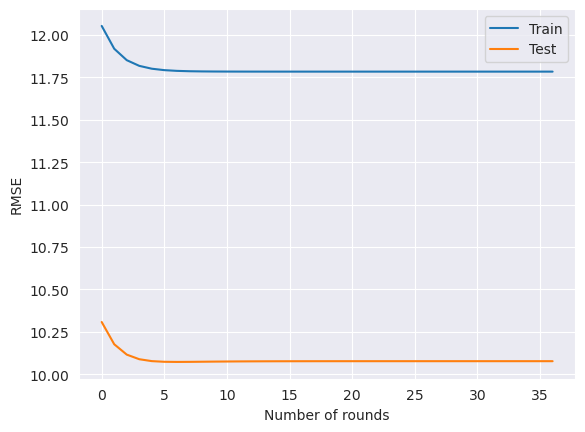

In [1002]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 150
stop_round = 30
verbose_eval = 10 

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

In order to improve on the model, some tweaking to the features might be necessary.

## Feature Engineering

Plotting the distribution of Years of Schooling

In [1003]:
df_data.S.describe()

count   1,487.00
mean       14.56
std         2.77
min         6.00
25%        12.00
50%        15.00
75%        16.00
max        20.00
Name: S, dtype: float64

<Axes: xlabel='S', ylabel='Count'>

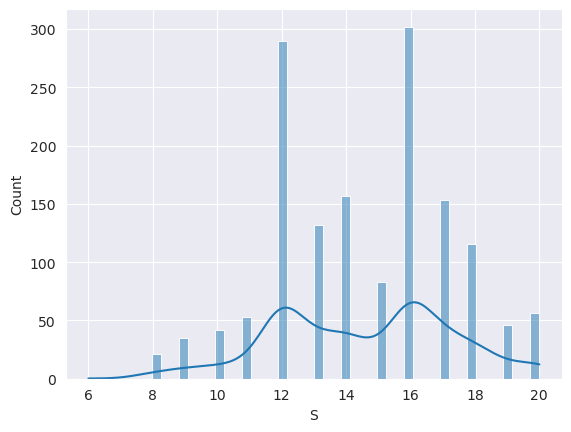

In [1004]:
sns.histplot(df_data.S, bins=50, kde=True)

<li>Binning</li>

Based on the distribution, let me try discretizing the years of schooling data

In [1005]:
# Use pandas' cut to turn the numerical column to categorical data
total_bins = 10
df_data['BINS'] = pd.cut(x=df_data['S'], bins=total_bins).cat.codes
df_data.BINS.head()

0    4
1    7
2    5
3    8
4    6
Name: BINS, dtype: int8

In [1006]:
X_categorized = df_data[['BINS']].copy()

In [1007]:
X_categorized.isna().any()

BINS    False
dtype: bool

In [1008]:
X_categorized['BINS'].value_counts()

BINS
7    455
4    422
5    157
8    116
9    102
6     83
2     77
3     53
1     21
0      1
Name: count, dtype: int64

In [1009]:
X_train, X_test, y_train, y_test = train_test_split(X_categorized, y, test_size=0.2, random_state=30)

In [1010]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.05807	Validation-rmse:10.30606
[1]	Training-rmse:11.92629	Validation-rmse:10.17319
[2]	Training-rmse:11.86052	Validation-rmse:10.11194
[3]	Training-rmse:11.82783	Validation-rmse:10.08441
[4]	Training-rmse:11.81153	Validation-rmse:10.07271
[5]	Training-rmse:11.80337	Validation-rmse:10.06851
[6]	Training-rmse:11.79928	Validation-rmse:10.06741
[7]	Training-rmse:11.79720	Validation-rmse:10.06756


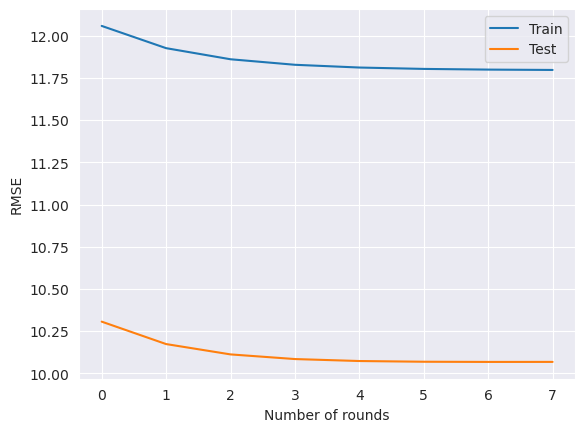

In [1011]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 50
stop_round = 1
verbose_eval = 1

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Slight improvement on validation dataset. However this is a destructive technique in some cases since some information is lost

What about transforming the data

<li>Feature Transformation</li>

a) Z-score Standardization

In [1012]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [1013]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_data[['S']])
X_scaled.shape

(1487, 1)

In [1014]:
print(f'Standard deviation: {X_scaled.std():.5}')
print(f'Mean: {X_scaled.mean():.5}')

Standard deviation: 1.0
Mean: 2.2936e-16


In [1015]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [1016]:
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.05389	Validation-rmse:10.30832
[10]	Training-rmse:11.78482	Validation-rmse:10.07549
[20]	Training-rmse:11.78446	Validation-rmse:10.07730
[30]	Training-rmse:11.78445	Validation-rmse:10.07736
[36]	Training-rmse:11.78445	Validation-rmse:10.07736


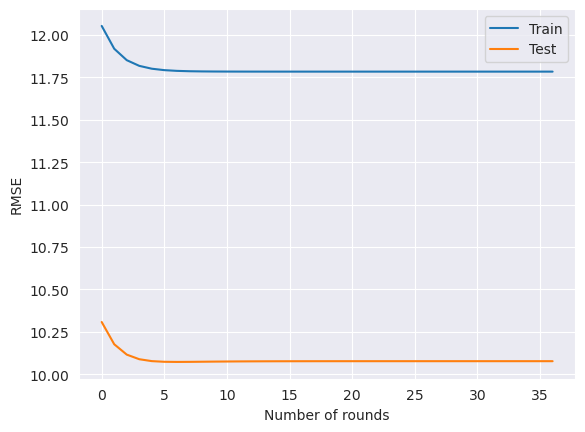

In [1017]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 150
stop_round = 30
verbose_eval = 10 

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Not much of a difference after scaling the values

b) Min-Max Scaling

In [1018]:
min_max = MinMaxScaler()
X_min_max = min_max.fit_transform(df_data[['S']])
X_min_max.shape

(1487, 1)

In [1019]:
print(f'Maximum: {X_min_max.max()}')
print(f'Minimum: {X_min_max.min()}')

Maximum: 0.9999999999999998
Minimum: 0.0


In [1020]:
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.05389	Validation-rmse:10.30832
[10]	Training-rmse:11.78482	Validation-rmse:10.07549
[20]	Training-rmse:11.78446	Validation-rmse:10.07730
[30]	Training-rmse:11.78445	Validation-rmse:10.07736
[36]	Training-rmse:11.78445	Validation-rmse:10.07736


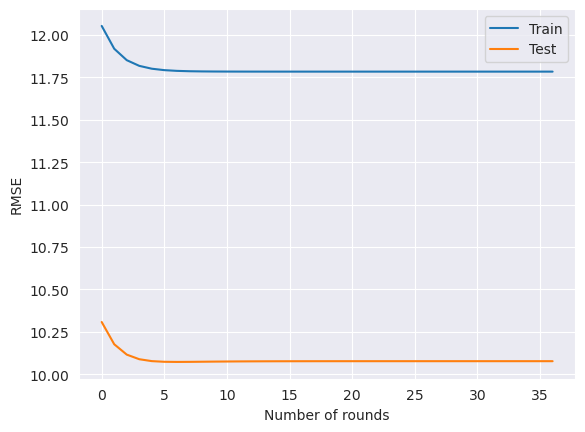

In [1021]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 150
stop_round = 30
verbose_eval = 10 

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Not much of a difference either.

c) Normalization

In [1022]:
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(df_data[['S']])
X_normalized.shape

(1487, 1)

In [1023]:
print(f'Mean: {X_normalized.mean()}')
print(f'Standard deviation: {X_normalized.std()}')

Mean: 1.0
Standard deviation: 0.0


In [1024]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.32072	Validation-rmse:10.58065
[10]	Training-rmse:12.32072	Validation-rmse:10.58065
[20]	Training-rmse:12.32072	Validation-rmse:10.58065
[29]	Training-rmse:12.32072	Validation-rmse:10.58065


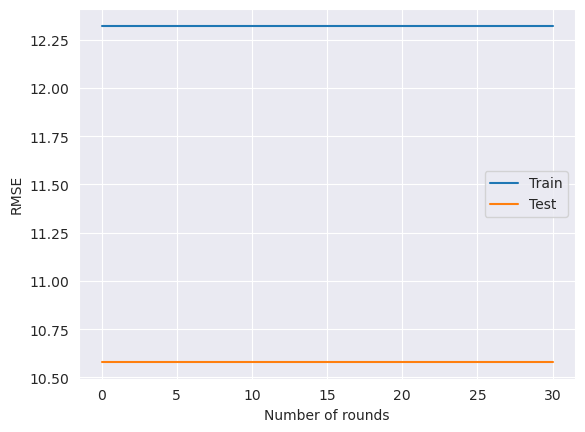

In [1025]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 150
stop_round = 30
verbose_eval = 10 

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

Performed even worse than the others

<ul><li>Hyper-parameter Tuning</li></ul>

In [1026]:
X_train, X_test, y_train, y_test = train_test_split(X_categorized, y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:11.99850	Validation-rmse:10.22956
[5]	Training-rmse:11.79847	Validation-rmse:10.06768


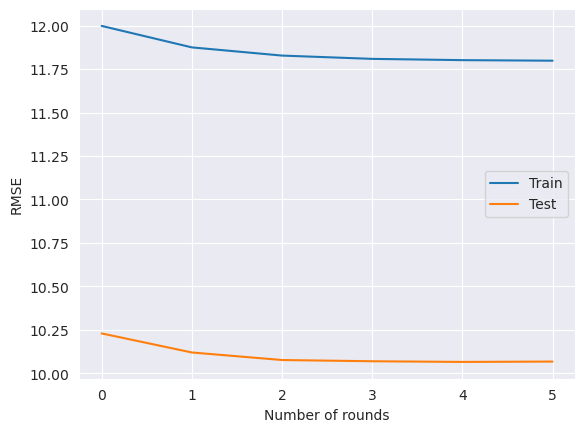

In [1027]:
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':2,
    'subsample': 1, 'eta': 0.4, 'min_child_weight': 1, 'colsample_bytree': 1,
    'gamma': 0.1, 'reg_alpha': 0.05, 'reg_lambda': 0.2}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 150
stop_round = 1
verbose_eval = 5

implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

Not really a huge change either

For another approach, let me add other features 

In [1028]:
# The asvab columns also highly correlated with the earnings column
df_data[asvab_col_names].corrwith(df_data['EARNINGS'])

ASVABWK   0.17
ASVABPC   0.18
ASVABNO   0.18
ASVABMV   0.24
ASVABMK   0.27
ASVABCS   0.12
ASVABC4   0.25
ASVABC    0.24
ASVABAR   0.26
VERBAL    0.19
dtype: float64

In [1029]:
df_data[asvab_col_names]

,ASVABWK,ASVABPC,ASVABNO,ASVABMV,ASVABMK,ASVABCS,ASVABC4,ASVABC,ASVABAR,VERBAL
0,-0.69,-0.31,-0.36,29818,-0.29,-0.72,-0.32,-0.21,0.12,-0.53
1,-0.10,-0.30,-1.21,46246,-0.55,-0.17,-0.14,0.13,0.45,-0.21
2,0.95,0.06,0.06,66480,0.29,-0.07,0.48,0.51,0.42,0.54
3,-0.06,-0.03,1.68,51240,-0.06,0.32,0.16,0.37,0.71,-0.05
4,0.33,0.78,0.22,89773,1.19,0.22,1.07,1.15,1.54,0.59
...,...,...,...,...,...,...,...,...,...,...
1482,-0.69,-1.35,0.20,22110,-0.34,-0.53,-0.81,-0.83,-0.50,-1.09
1483,-0.79,-1.73,-1.81,7706,-1.53,-1.15,-1.78,-1.95,-2.29,-1.35
1484,0.11,1.45,0.57,75186,0.67,0.74,0.73,0.65,0.40,0.83
1485,-0.42,-0.18,-1.13,25700,-1.11,-0.69,-0.84,-0.87,-1.28,-0.32


In [1030]:
df_data[asvab_col_names].mean()

ASVABWK        0.16
ASVABPC        0.16
ASVABNO        0.15
ASVABMV   56,113.32
ASVABMK        0.20
ASVABCS        0.15
ASVABC4        0.20
ASVABC         0.21
ASVABAR        0.22
VERBAL         0.17
dtype: float64

The features have to be scaled.

In [1031]:
df_data[asvab_col_names] = scaler.fit_transform(df_data[asvab_col_names])

In [1032]:
df_data[asvab_col_names].corr()

,ASVABWK,ASVABPC,ASVABNO,ASVABMV,ASVABMK,ASVABCS,ASVABC4,ASVABC,ASVABAR,VERBAL
ASVABWK,1.00,0.73,0.43,0.84,0.65,0.43,0.86,0.85,0.66,0.93
ASVABPC,0.73,1.00,0.51,0.88,0.71,0.50,0.89,0.88,0.72,0.93
ASVABNO,0.43,0.51,1.00,0.58,0.63,0.56,0.61,0.58,0.57,0.51
ASVABMV,0.84,0.88,0.58,1.00,0.86,0.55,0.97,0.95,0.86,0.92
ASVABMK,0.65,0.71,0.63,0.86,1.00,0.56,0.89,0.82,0.80,0.73
ASVABCS,0.43,0.50,0.56,0.55,0.56,1.00,0.57,0.54,0.51,0.50
ASVABC4,0.86,0.89,0.61,0.97,0.89,0.57,1.00,0.98,0.90,0.94
ASVABC,0.85,0.88,0.58,0.95,0.82,0.54,0.98,1.00,0.94,0.93
ASVABAR,0.66,0.72,0.57,0.86,0.80,0.51,0.90,0.94,1.00,0.74
VERBAL,0.93,0.93,0.51,0.92,0.73,0.50,0.94,0.93,0.74,1.00


In [1033]:
df_data[asvab_col_names].corrwith(df_data['EARNINGS'])

ASVABWK   0.17
ASVABPC   0.18
ASVABNO   0.18
ASVABMV   0.24
ASVABMK   0.27
ASVABCS   0.12
ASVABC4   0.25
ASVABC    0.24
ASVABAR   0.26
VERBAL    0.19
dtype: float64

In [1034]:
# Check for correlation with Years of Schooling(Category)
df_data[asvab_col_names].corrwith(df_data['BINS'])

ASVABWK   0.44
ASVABPC   0.50
ASVABNO   0.41
ASVABMV   0.56
ASVABMK   0.54
ASVABCS   0.36
ASVABC4   0.55
ASVABC    0.52
ASVABAR   0.46
VERBAL    0.51
dtype: float64

In [1035]:
X = df_data[['BINS', 'ASVABMK']]
y = df_data['EARNINGS']

In [1036]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.27031	Validation-rmse:10.54915
[50]	Training-rmse:11.33107	Validation-rmse:10.21621
[100]	Training-rmse:11.02134	Validation-rmse:10.22541
[150]	Training-rmse:10.53095	Validation-rmse:10.24020
[200]	Training-rmse:10.31056	Validation-rmse:10.30300
[250]	Training-rmse:10.13823	Validation-rmse:10.36290
[300]	Training-rmse:9.97698	Validation-rmse:10.40543
[350]	Training-rmse:9.87102	Validation-rmse:10.44931
[400]	Training-rmse:9.78067	Validation-rmse:10.50949
[450]	Training-rmse:9.68304	Validation-rmse:10.53950
[499]	Training-rmse:9.58977	Validation-rmse:10.57109


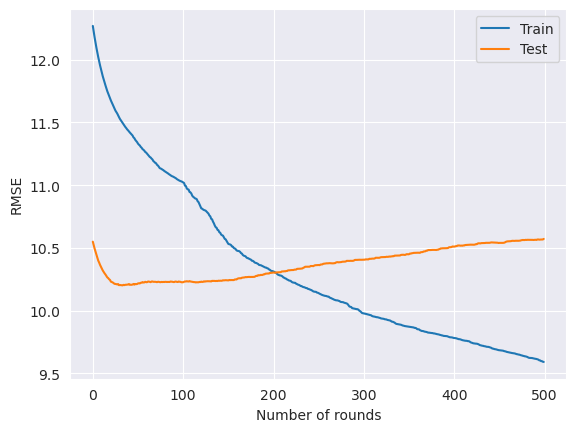

In [1037]:
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':3,
    'subsample': 1, 'eta': 0.03, 'min_child_weight': 1, 'colsample_bytree': 1,
    'gamma': 1, 'reg_alpha': 0.01, 'reg_lambda': 0.01}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 500
stop_round = 0
verbose_eval = 50

implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

Better results on the training set but slightly worse on the test set

<ul><li>Feature Crossing</li></ul>

In [1038]:
from sklearn.preprocessing import PolynomialFeatures

In [1039]:
poly = PolynomialFeatures(degree=2)

In [1040]:
X_crossed = poly.fit_transform(df_data[['BINS', 'ASVABMK']])

In [1041]:
X_crossed.shape

(1487, 6)

In [1042]:
X_train, X_test, y_train, y_test = train_test_split(X_crossed, y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:11.35160	Validation-rmse:10.51553
[10]	Training-rmse:8.30820	Validation-rmse:11.46241
[20]	Training-rmse:7.28592	Validation-rmse:11.57240
[30]	Training-rmse:6.78205	Validation-rmse:11.93120
[40]	Training-rmse:6.11286	Validation-rmse:12.19826
[50]	Training-rmse:5.65466	Validation-rmse:12.37276
[60]	Training-rmse:5.24172	Validation-rmse:12.51755
[70]	Training-rmse:4.92406	Validation-rmse:12.65427
[80]	Training-rmse:4.63209	Validation-rmse:12.77187
[90]	Training-rmse:4.35444	Validation-rmse:12.83531
[100]	Training-rmse:4.13400	Validation-rmse:12.91629


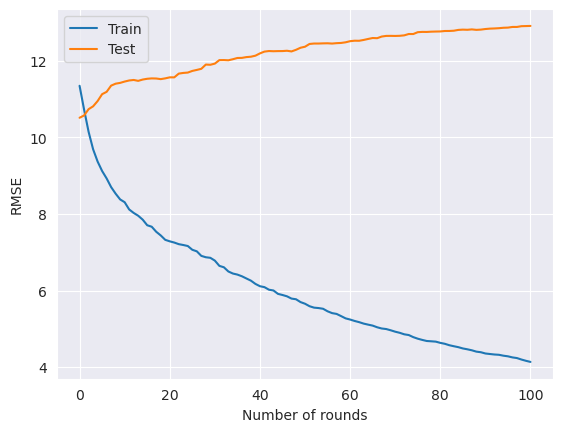

In [1043]:
params = {'objective': 'reg:squarederror', 'tree_method': 'hist', 'eval_metric': 'rmse'}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 150
stop_round = 100
verbose_eval = 10 

implement_xgboost(dtrain_reg, params, evals, n, stop_round, verbose_eval)

The data is overfitting. Although the bias is decreasing with each step

Principal Componenent Analysis

In [1044]:
from sklearn.decomposition import PCA

In [1045]:
pca = PCA(n_components=2)
pca.fit(df_data[asvab_col_names])

PCA(n_components=2)

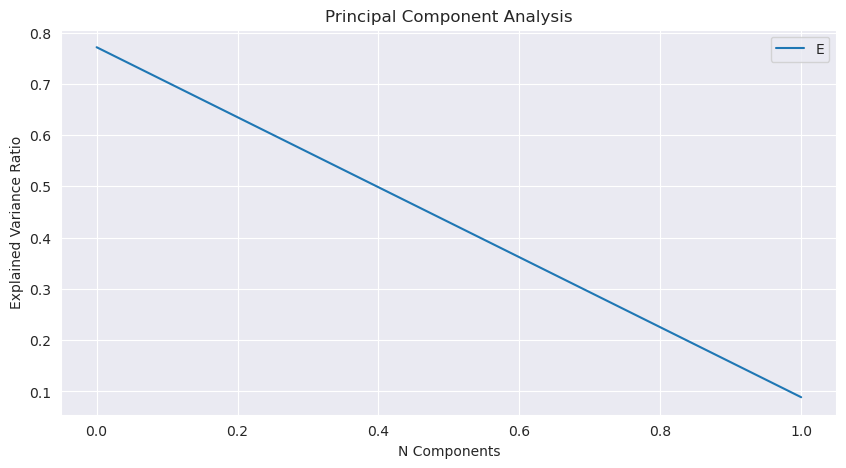

In [1046]:
plt.figure(figsize=(10, 5))
plt.title('Principal Component Analysis')
plt.plot(pca.explained_variance_ratio_)
plt.legend('Explained Variance')
plt.xlabel('N Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [1047]:
# Reduced the dimensionality of the ASVAB features to 2 components
X_pca = pca.transform(df_data[asvab_col_names])
X_pca.shape

(1487, 2)

In [1048]:
# Add the Bins feature to the numpy array
X_pca = np.c_[X_pca, df_data[['BINS']].to_numpy()]
X_pca.shape

(1487, 3)

In [1049]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.13743	Validation-rmse:10.52919
[30]	Training-rmse:10.26332	Validation-rmse:10.34218
[60]	Training-rmse:9.65374	Validation-rmse:10.34296
[90]	Training-rmse:9.16852	Validation-rmse:10.37675
[120]	Training-rmse:8.67642	Validation-rmse:10.53651
[150]	Training-rmse:8.30858	Validation-rmse:10.61089
[180]	Training-rmse:7.99470	Validation-rmse:10.72093
[210]	Training-rmse:7.71179	Validation-rmse:10.82696
[240]	Training-rmse:7.42226	Validation-rmse:10.94572
[270]	Training-rmse:7.11419	Validation-rmse:11.06186
[299]	Training-rmse:6.87230	Validation-rmse:11.12198


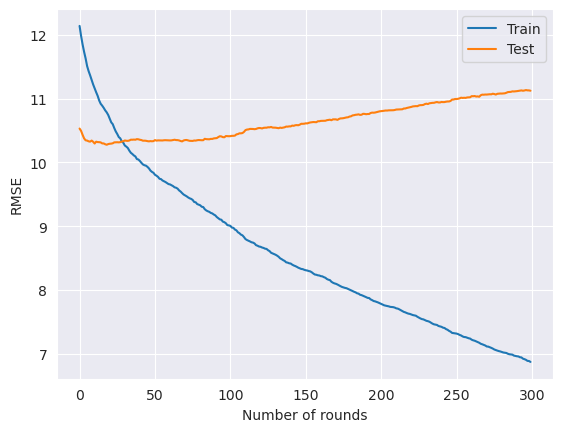

In [1050]:
# PCA with tuned hyperparameter
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':4,
    'subsample': 1, 'eta': 0.1, 'min_child_weight': 2, 'colsample_bytree': 1,
    'gamma': 0.5, 'reg_alpha': 0.1, 'reg_lambda': 1.5}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 300
stop_round = 0
verbose_eval = 30

implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

Simple model utilizing the information contained in multiple features

Without Principal Component Analysis with the same parameters

In [1051]:
X_train, X_test, y_train, y_test = train_test_split(df_data[asvab_col_names + ['BINS']], y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.09525	Validation-rmse:10.49733
[30]	Training-rmse:9.26439	Validation-rmse:10.41708
[60]	Training-rmse:8.14565	Validation-rmse:10.50158
[90]	Training-rmse:7.40586	Validation-rmse:10.59121
[120]	Training-rmse:6.62972	Validation-rmse:10.62602
[150]	Training-rmse:6.01250	Validation-rmse:10.73911
[180]	Training-rmse:5.48264	Validation-rmse:10.88282
[210]	Training-rmse:4.98416	Validation-rmse:10.91368
[240]	Training-rmse:4.57551	Validation-rmse:10.96493
[270]	Training-rmse:4.16735	Validation-rmse:10.99322
[299]	Training-rmse:3.80444	Validation-rmse:10.99627


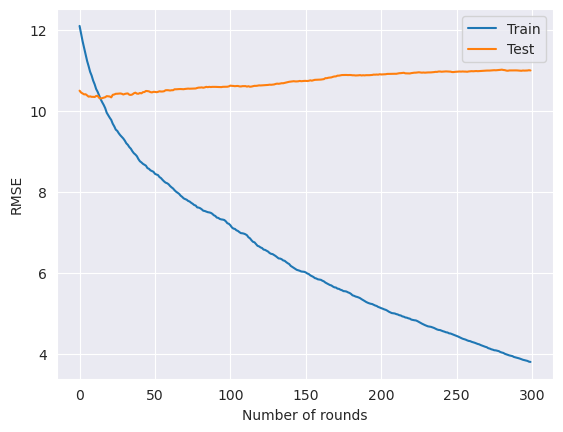

In [1052]:
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':4,
    'subsample': 1, 'eta': 0.1, 'min_child_weight': 2, 'colsample_bytree': 1,
    'gamma': 0.5, 'reg_alpha': 0.1, 'reg_lambda': 1.5}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 300
stop_round = 0
verbose_eval = 30 

implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

Less bias, however the model is more complex due to more features being trained

More work is needed to be done to improve on the validation score

<li>Using all the features</li>

In [1053]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'SINGLE', 'MARRIED', 'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC',
       'FAITHJ', 'FAITHO', 'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC',
       'ASVABMK', 'ASVABNO', 'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL',
       'ASVABMV', 'HEIGHT', 'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR',
       'SIBLINGS', 'REG97NE', 'REG97NC', 'REG97S', 'REG97W', 'RS97RURL',
       'RS97URBN', 'RS97UNKN', 'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI',
       'CATNPO', 'CATMIS', 'CATSE', 'COLLBARG', 'URBAN', 'REGNE', 'REGNC',
       'REGW', 'REGS', 'MSA11NO', 'MSA11NCC', 'MSA11CC', 'MSA11NK', 'MSA11NIC',
       'BINS'],
      dtype='o

In [1054]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['EARNINGS', 'BINS','ID'], axis=1),
                                                    y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)


[0]	Training-rmse:12.19851	Validation-rmse:10.55795
[40]	Training-rmse:10.29486	Validation-rmse:10.04087
[80]	Training-rmse:9.61703	Validation-rmse:9.86042
[120]	Training-rmse:9.12615	Validation-rmse:9.80896
[160]	Training-rmse:8.74390	Validation-rmse:9.76681
[200]	Training-rmse:8.46084	Validation-rmse:9.75654
[240]	Training-rmse:8.19431	Validation-rmse:9.66830
[280]	Training-rmse:7.96447	Validation-rmse:9.67334
[301]	Training-rmse:7.83320	Validation-rmse:9.67037


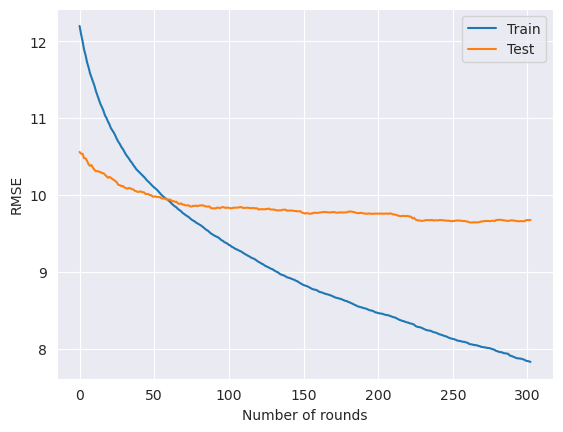

In [1055]:
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':2,
    'subsample': 1, 'eta': 0.08, 'min_child_weight': 1, 'colsample_bytree': 1,
    'gamma': 1, 'reg_alpha': 0.1, 'reg_lambda': 2}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 400
stop_round = 40
verbose_eval = 40 

model = implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

Better score. However the model is too complex

Plot the most important features used by the model

In [1056]:
from xgboost import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

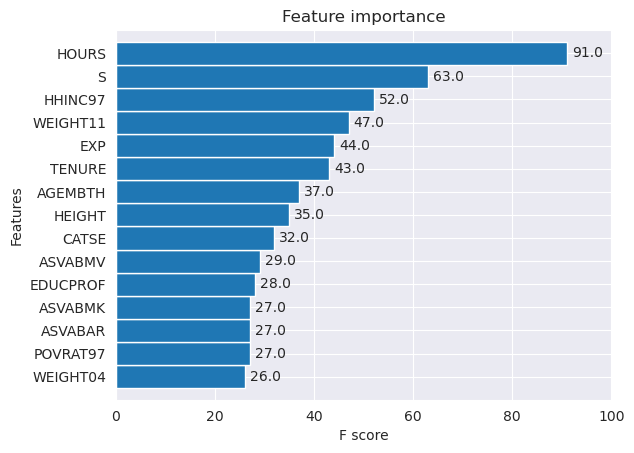

In [1057]:
plot_importance(model, height=1, max_num_features=15)

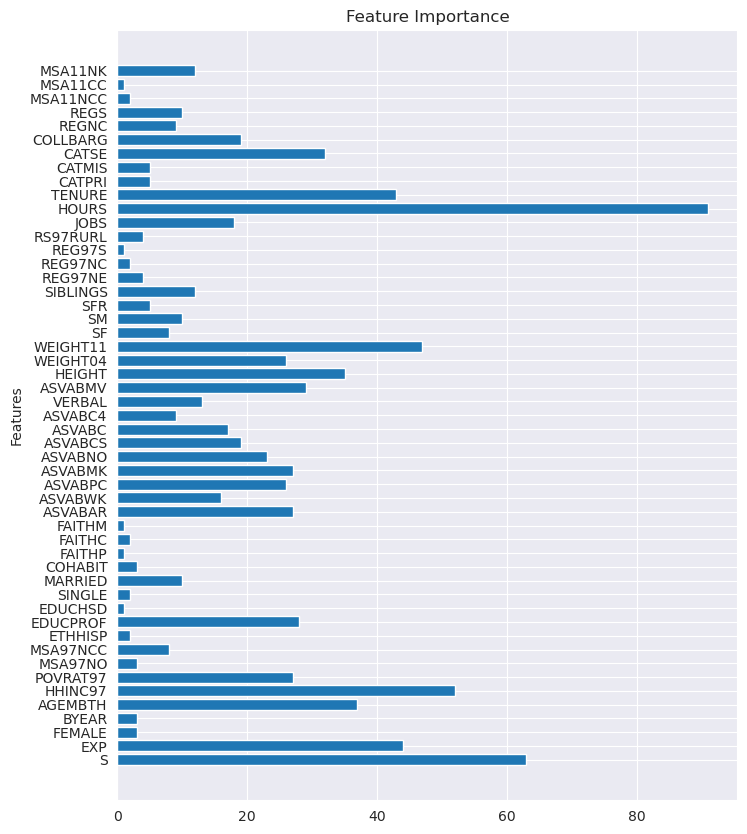

In [1058]:
feature_important = model.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

plt.figure(figsize=(8, 10))
plt.barh(keys, values)
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

From the most important features, pick the ones I can use for my model

In [1082]:
# I'll use 8 features
selected_features = ['HOURS', 'S', 'HHINC97', 'WEIGHT11', 'EXP', 'TENURE', 'AGEMBTH', 'HEIGHT']

In [1083]:
X_train, X_test, y_train, y_test = train_test_split(df_data[selected_features], y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.21980	Validation-rmse:10.47172
[40]	Training-rmse:10.98793	Validation-rmse:9.60878
[80]	Training-rmse:10.55754	Validation-rmse:9.49855


[92]	Training-rmse:10.46917	Validation-rmse:9.49081


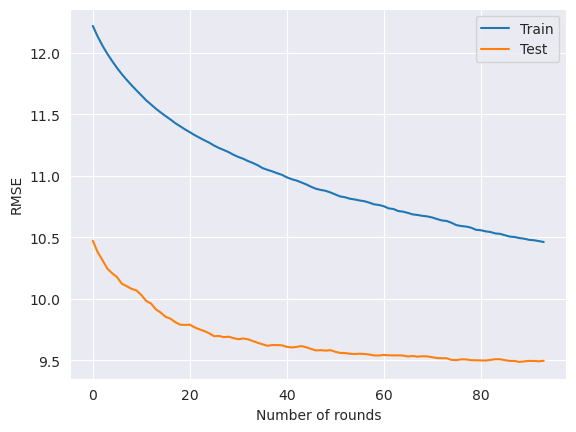

In [1094]:
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':2,
    'subsample': 1, 'eta': 0.08, 'min_child_weight': 1, 'colsample_bytree': 1,
    'gamma': 1, 'reg_alpha': 0.1, 'reg_lambda': 2}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 400
stop_round = 5
verbose_eval = 40 

model = implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

Not bad! A good improvement to the validation dataset while still making the model simple enough

With this, I can try to create new data from the existing features and see if they'll have any importance

<li>Create new features</li>

a) Weight difference between 2011 and 2004

In [1062]:
df_data['WEIGHT_DIFF'] = df_data['WEIGHT11'] - df_data['WEIGHT04']

In [1063]:
df_data.WEIGHT_DIFF.describe()

count   1,487.00
mean       13.07
std        23.99
min      -130.00
25%         0.00
50%        10.00
75%        25.00
max       178.00
Name: WEIGHT_DIFF, dtype: float64

In [1064]:
X_train, X_test, y_train, y_test = train_test_split(df_data[['WEIGHT_DIFF']], y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.30664	Validation-rmse:10.57565
[40]	Training-rmse:12.14378	Validation-rmse:10.58244
[80]	Training-rmse:12.05347	Validation-rmse:10.59178
[120]	Training-rmse:11.99845	Validation-rmse:10.63109
[160]	Training-rmse:11.95264	Validation-rmse:10.63226
[200]	Training-rmse:11.92364	Validation-rmse:10.64812
[240]	Training-rmse:11.89678	Validation-rmse:10.64483
[280]	Training-rmse:11.87367	Validation-rmse:10.65563
[320]	Training-rmse:11.85453	Validation-rmse:10.66781
[360]	Training-rmse:11.83778	Validation-rmse:10.68590
[399]	Training-rmse:11.82625	Validation-rmse:10.69085


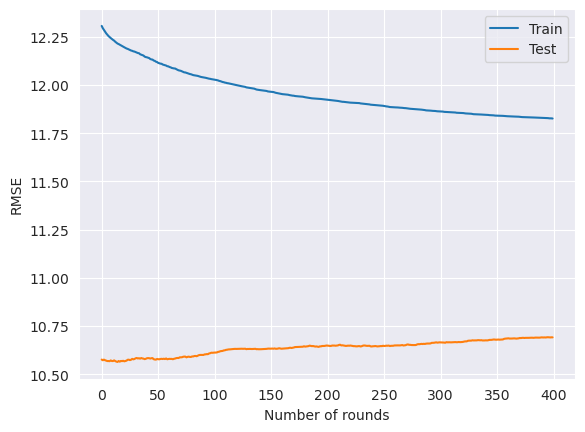

In [1065]:
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':2,
    'subsample': 1, 'eta': 0.08, 'min_child_weight': 1, 'colsample_bytree': 1,
    'gamma': 1, 'reg_alpha': 0.1, 'reg_lambda': 2}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 400
stop_round = 0
verbose_eval = 40 

model = implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

b) Total Time Spent Working

In [1066]:
df_data.HOURS.describe()

count   1,487.00
mean       39.10
std        10.90
min        10.00
25%        37.00
50%        40.00
75%        40.00
max        80.00
Name: HOURS, dtype: float64

In [1067]:
df_data.TENURE.describe()

count   1,487.00
mean        3.56
std         2.63
min         0.06
25%         1.21
50%         3.10
75%         5.31
max        11.77
Name: TENURE, dtype: float64

In [1068]:
# There are 52 weeks in a year so...
df_data['TOTAL_TIME'] = (df_data['HOURS'] * df_data['TENURE'] * 52)
df_data['TOTAL_TIME'].describe()

count    1,487.00
mean     7,364.93
std      5,931.04
min         70.00
25%      2,250.00
50%      6,016.00
75%     11,176.50
max     36,075.01
Name: TOTAL_TIME, dtype: float64

In [1079]:
X_train, X_test, y_train, y_test = train_test_split(df_data[['TOTAL_TIME']], y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.28294	Validation-rmse:10.55334
[40]	Training-rmse:11.85165	Validation-rmse:10.55765
[80]	Training-rmse:11.71237	Validation-rmse:10.70099
[120]	Training-rmse:11.62756	Validation-rmse:10.78688
[160]	Training-rmse:11.55525	Validation-rmse:10.86510
[200]	Training-rmse:11.50316	Validation-rmse:10.94062
[240]	Training-rmse:11.44492	Validation-rmse:10.96396
[280]	Training-rmse:11.39501	Validation-rmse:10.99568
[320]	Training-rmse:11.34103	Validation-rmse:11.03790
[360]	Training-rmse:11.29655	Validation-rmse:11.05650
[399]	Training-rmse:11.25486	Validation-rmse:11.09969


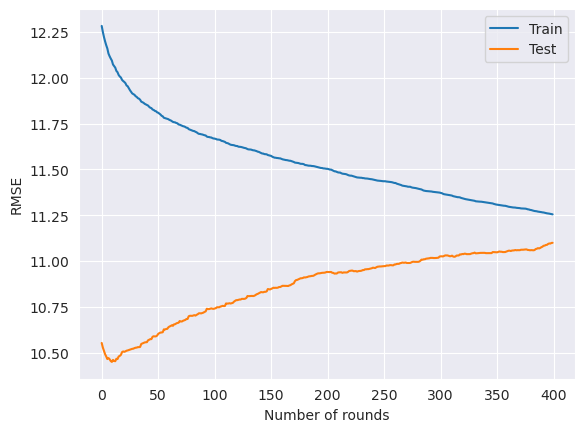

In [1080]:
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':2,
    'subsample': 1, 'eta': 0.08, 'min_child_weight': 1, 'colsample_bytree': 1,
    'gamma': 1, 'reg_alpha': 0.1, 'reg_lambda': 2}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 400
stop_round = 0
verbose_eval = 40 

model = implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

Try checking if the created features have any importance in the model

In [1071]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['EARNINGS', 'BINS','ID'], axis=1),
                                                    y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)


[0]	Training-rmse:12.19852	Validation-rmse:10.55795
[40]	Training-rmse:10.28920	Validation-rmse:10.03060
[80]	Training-rmse:9.59792	Validation-rmse:9.94721
[120]	Training-rmse:9.11028	Validation-rmse:9.91065
[149]	Training-rmse:8.83010	Validation-rmse:9.94586


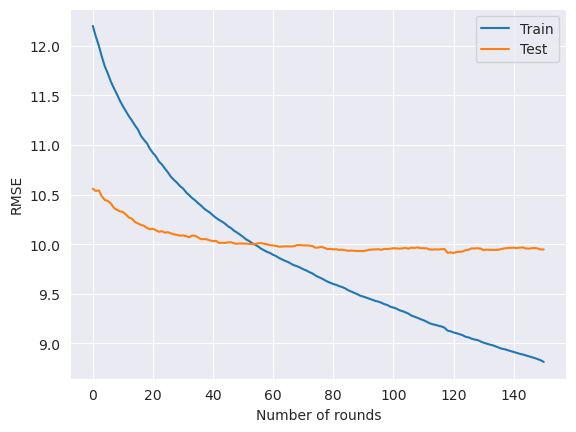

In [1072]:
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':2,
    'subsample': 1, 'eta': 0.08, 'min_child_weight': 1, 'colsample_bytree': 1,
    'gamma': 1, 'reg_alpha': 0.2, 'reg_lambda': 2}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 400
stop_round = 30
verbose_eval = 40 

model = implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

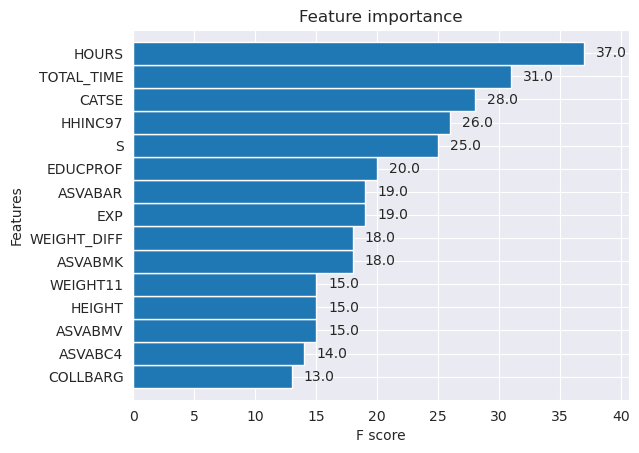

In [1073]:
plot_importance(model, height=1, max_num_features=15)

In [1074]:
selected_features = ['HOURS', 'TOTAL_TIME', 'CATSE', 'HHINC97', 'S']

In [1075]:
df_data[selected_features].corr()

,HOURS,TOTAL_TIME,CATSE,HHINC97,S
HOURS,1.00,0.38,-0.03,0.06,0.09
TOTAL_TIME,0.38,1.00,-0.05,0.05,0.04
CATSE,-0.03,-0.05,1.00,0.03,-0.09
HHINC97,0.06,0.05,0.03,1.00,0.29
S,0.09,0.04,-0.09,0.29,1.00


In [1076]:
# I'll scale the features however since am using XGBoost, it's not really necessary
scaled_features = scaler.fit_transform(df_data[selected_features])

In [1077]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=30)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

[0]	Training-rmse:12.28711	Validation-rmse:10.54718
[40]	Training-rmse:11.71099	Validation-rmse:10.09917
[80]	Training-rmse:11.45621	Validation-rmse:9.97160
[120]	Training-rmse:11.30634	Validation-rmse:9.93111
[160]	Training-rmse:11.20677	Validation-rmse:9.92167
[200]	Training-rmse:11.13861	Validation-rmse:9.91849
[240]	Training-rmse:11.09109	Validation-rmse:9.92378
[280]	Training-rmse:11.05338	Validation-rmse:9.92257
[320]	Training-rmse:11.02070	Validation-rmse:9.92215
[360]	Training-rmse:10.99206	Validation-rmse:9.92379
[399]	Training-rmse:10.96757	Validation-rmse:9.92507


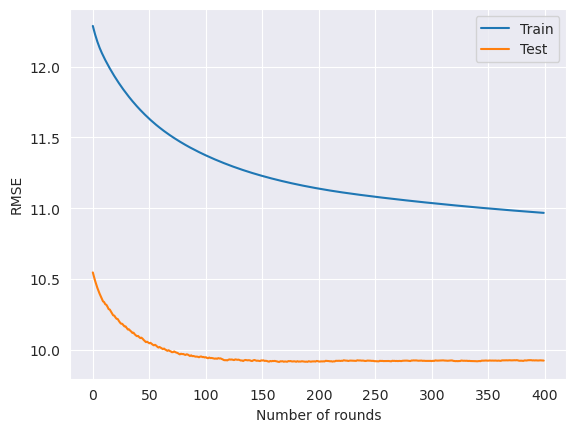

In [1078]:
params_tuned = {'objective': 'reg:squarederror', 'tree_method': 'hist','max_depth':1,
    'subsample': 1, 'eta': 0.04, 'min_child_weight': 1, 'colsample_bytree': 1,
    'gamma': 2, 'reg_alpha': 1, 'reg_lambda': 2}
evals = [(dtrain_reg, 'Training'), (dtest_reg, 'Validation')]
n = 400
stop_round = 0
verbose_eval = 40 

model = implement_xgboost(dtrain_reg, params_tuned, evals, n, stop_round, verbose_eval)

Not much of an improvement but it still works.

## Conclusion

<ol>
    <li>The more complex the model, the higher the chances were of overfitting</li>
    <li>Selecting the best features used in splits provided the best validation scores</li>
    <li>Simpler models had more bias</li>
    <li>Hyperparameter tuning was a necessity to get better scores</li>
    <li>Always start simple in that I was able to get better scores than the baseline I had set at the beginning as I kept on increasing the complexity of the model - From 10.07 to 9.49(Best)</li>
</ol>